In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()



In [4]:
print(len(x_train))

60000


In [5]:
len(x_test)


10000

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

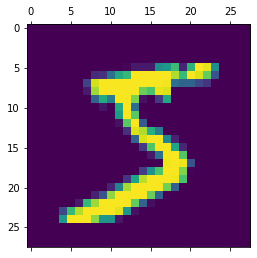

In [10]:
plt.matshow(x_train[0])

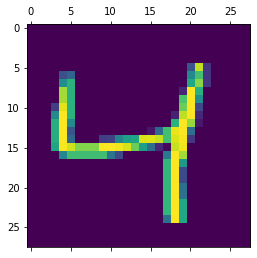

In [11]:
plt.matshow(x_train[2])

In [12]:
y_train[2]

4

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
x_train_flattened=x_train.reshape(len(x_train),28*28)



In [7]:
x_train_flattened.shape

(60000, 784)

In [8]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [26]:
x_test_flattened.shape

(10000, 784)

In [27]:
model=keras.Sequential\
([
keras.layers.Dense( 10,input_shape=(784,),activation='sigmoid')
])
model.compile\
(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4913 - accuracy: 0.8751

In [28]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9268

[0.26720914244651794, 0.926800012588501]

In [30]:
y_predicted=model.predict(x_test_flattened)

In [31]:
y_predicted[0]

array([2.6656096e-05, 1.2083817e-10, 4.0553659e-05, 8.6131990e-03,
       9.6453039e-07, 9.1593603e-05, 8.7375840e-10, 7.1323937e-01,
       9.6314892e-05, 9.1111660e-04], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

7

In [33]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [34]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    1,    0,    4,    3,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [  13,    6,  930,    7,    8,    3,   11,    9,   41,    4],
       [   6,    0,   23,  909,    0,   26,    2,   11,   26,    7],
       [   2,    1,    3,    1,  916,    0,    9,    4,   10,   36],
       [  12,    3,    3,   26,   10,  781,   15,    2,   33,    7],
       [  16,    3,    8,    1,    8,    9,  908,    2,    3,    0],
       [   3,    6,   23,    5,    9,    1,    0,  940,    3,   38],
       [  10,    6,    6,   15,    9,   22,    8,    7,  885,    6],
       [  11,    7,    1,    9,   23,    7,    0,   18,   12,  921]])>

Text(69.0, 0.5, 'Truth')

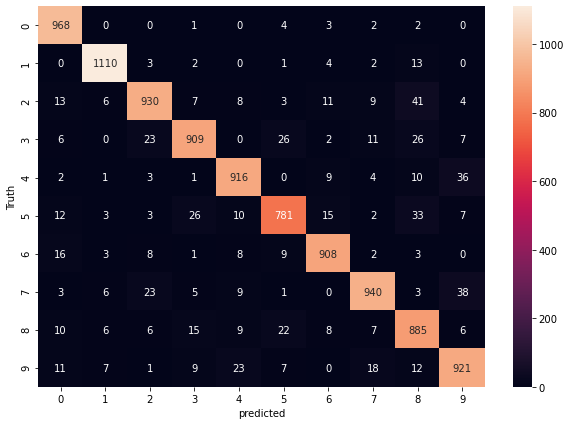

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [10]:
model=keras.Sequential\
([
keras.layers.Dense( 100,input_shape=(784,),activation='relu'),
keras.layers.Dense( 10,activation='sigmoid')
])
model.compile\
(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2922 - accuracy: 0.9177

In [22]:
model=keras.Sequential\
([
keras.layers.Dense( 100,input_shape=(784,),activation='relu'),
keras.layers.Dense( 50,activation='relu'),
keras.layers.Dense( 25,activation='sigmoid'),
keras.layers.Dense( 10,activation='sigmoid')
])
model.compile\
(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5258 - accuracy: 0.8959

In [23]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 969us/step - loss: 0.0893 - accuracy: 0.9732


[0.08931278437376022, 0.9732000231742859]

In [24]:
y_predicted=model.predict(x_test_flattened)

In [25]:
np.argmax(y_predicted[0])

7

In [27]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

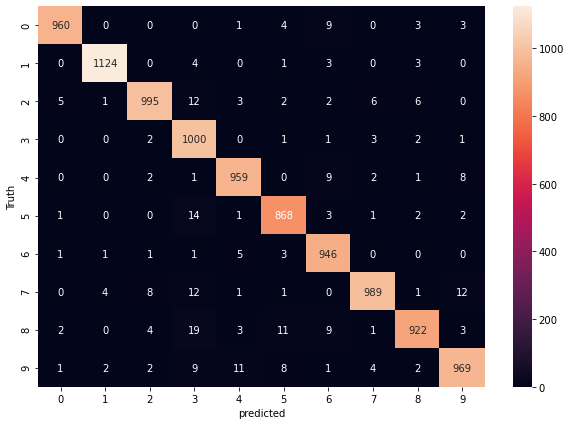

In [30]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
